# Awesome Data Analysis Company

Here at Awesome Data Analysis Company, we offer a wide range of data analysis services for any client.  We employ experts in the field of data analysis, each of whom specializes in an area of science, engineering, or mathematics.  You are receiving this IPython notebook in response to your Request for Information regarding three separate projects your company has in the works.

##Tools of the Trade
The Awesome Data Analysis Company makes extensive use of Python and IPython Notebooks to create polished, presentable, repeatable, and well-documented examples of automated data analysis.  IPython Notebooks are a product of academia, where the idea of an electronic lab notebook took off as a way to make public the steps and thought processes behind protocols and research conducted in the lab.  Scientists have used paper lab notebooks for centuries as a means of documenting experiments at every step: from data collection to data analysis, and drawing logical conclusions based on data. IPython lab notebooks allow data collection, protocols and results to be linked together and made available online, making the concepts easy to reference and explore.  For more information, refer to [this article](http://www.nature.com/naturejobs/science/articles/10.1038/nj7493-523a) about IPython notebooks and their history.  

Throughout this notebook, we will point out key features of our tools and explain how we use them to present clear, consise, and visually attractive electronic whitepapers.  Our company also offers a wide variety of Python, IPyhton, and Anaconda courses as well as general data analysis classes that you may purchase to train your employees on how to leverage this amazing technology for your business.

##Let's find some weather data!
Now to learn how to use Python to analyze data.  Let's start with a familiar example.  We obtained a small csv file containing weather data courtesy of [NOAA's Climate Data Online](http://www.ncdc.noaa.gov/cdo-web/search).

NOAA offers the weather data recorded at weather stations around the country.  This data is available free of charge and is searchable.  To request data, simply go to the website, enter search parameters, and place an "order". The data is sent in a csv file for downloading. The data used in the following examples was ordered using these search parameters:
1.  Custom Options: 	Station name, Geographic location
2.  Locations: 	ZIP: 31088 - Warner Robins, GA 31088
3.  Data Types: 	SNOW - Snowfall (mm)
  1.  TMAX - Maximum temperature (tenths of &deg;C)
  3.  TMIN - Minimum temperature (tenths of &deg;C)
  5.  PRCP - Precipitation (tenths of mm)
  6.  TOBS - Temperature at the time of observation (tenths of &deg;C)

###A Quick Word on Markdown Text
Notice that the paragraph contains only text with some standard formats normally found in electronic documents.  This cell is called a Markdown cell because it uses the Markdown text to HTML conversion specification to generate HTML without writing any HTML code.  A header introduces the paragraph.  Headers are denoted by using a hashtag (#).  One hashtag designates the top-level header, and subsequent headers have multiple hashtags.  For example, the first line of text in this notebook is the main title, and it uses only one hashtag; this makes it the top-level heading.  The paragraph before this one is a second-level heading and it has two hashtags in front of the text.  This paragraph is a third-level header and it has 3 hashtags.

There is also a numbered list of items in the previous paragraph.  Numbered lists are created by starting a line with a number followed by a period.  The numbers do not need to be in order; the Markdown converter takes care of assigning numbers to each item in the list.  Lower levels in the list are designated by indenting the numbers.

We have also added a few hyperlinks to the text.  Hyperlinks are denoted by placing the hyperlink text visible to the user in square brackets '[]'.  The link URL belongs inside parenthesis and immediately follows the text inside the square brackets.

The Markdown syntax is quite extensive in its capability.  For more notebook formatting tips, try this [Markdown Syntax Cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet).

###Read in the data
Going back to our data analysis example, we saved the data file to a hard drive after ordering it from NOAA.  Before we can perform any analysis on the data, it must be extracted from the file by reading it into memory.  

To read the data, we used an Anaconda Python library called 'pandas'.  Pandas is a numerical manipulation library with extensive numerical analysis features.  We used the 'read_csv()' function to read the data.  We created a variable called url and set it to a string containing the file path for the data. The argument "index_col='DATE'" treats the date column as the index for each row, the "parse_dates=True" argument parses the index column as a date, and "dayfirst=False" puts the month first in the date. The data is placed in a DataFrame object.

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

url = "WarnerRobinsWeather 615991.csv"

df = pd.read_csv(url, index_col='DATE', parse_dates=True, dayfirst=False)

Now let's take a quick look at the dataset to make sure the data looks right. To do that, we use the head() function to show the first 2 rows of the dataset.  The data table shows that the date has been parsed and formatted as a date with the year first, month next, and day last.  This is a reault of the arguments we passed to the read_csv() function.  We could have chosen to use any column as the index, or we could have formatted the date differntly by using different arguments.  

The table also shows the station handle and name, along with the station's latitude, longitude, and elevation.  The amount of precipitation, snowfall, maximum temperature, minimum temperature, and the temperature when the data was collected are listed in the table's columns.  After confirming that the data is formatted as we expect, we can continue with the analysis.

Note that the first two rows are listed here for brevity.  The complete data set used in this notebook appear at the end of the notebook.

In [55]:
df.head(2)

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,PRCP,SNOW,TMAX,TMIN,TOBS
DATE,,,,,,,,,,
2015-01-01,GHCND:USC00099124,WARNER ROBINS GA US,128,32.6094,-83.6163,0,-9999,144,6,100
2015-01-02,GHCND:USC00099124,WARNER ROBINS GA US,128,32.6094,-83.6163,10,-9999,133,78,106


###Drawing Conclusions Based on Statistics
Now let's look at some statistics. Pandas has built-in functions that allow for statistical analysis.  Here we used the describe() function to show statistics for our dataset.  

In [56]:
df.describe()

,ELEVATION,LATITUDE,LONGITUDE,PRCP,SNOW,TMAX,TMIN,TOBS
count,269,269.0000,269.0000,269.000000,269,269.000000,269.000000,269.000000
mean,128,32.6094,-83.6163,32.877323,-9999,254.776952,142.639405,177.223048
std,0,0.0000,0.0000,77.797454,0,83.246053,84.909215,79.671354
min,128,32.6094,-83.6163,0.000000,-9999,11.000000,-94.000000,-56.000000
25%,128,32.6094,-83.6163,0.000000,-9999,194.000000,83.000000,133.000000
50%,128,32.6094,-83.6163,0.000000,-9999,278.000000,172.000000,206.000000
75%,128,32.6094,-83.6163,20.000000,-9999,322.000000,217.000000,239.000000
max,128,32.6094,-83.6163,467.000000,-9999,378.000000,256.000000,283.000000


It is a good practice when performing data analysis to begin by checking the data for integrity by making small, rather obvious conclusions and comparing those conclusions to what we know.  This exercise serves to confirm that the data we see makes sense for Middle Georgia weather.  This way, if the data is wrong for any reason (records got mixed up, data were entered incorrectly, sensors are offline or malfunctioning, etc.) we know about the problem before spending much time analyzing more complex concepts.  Accurate data is the cornerstone of data analysis.

From these statistics, we can draw a few conclusions.  The latitude, longitude, and elevation mean, minimum, and maximum are the same.  Also, the standard deviation (std) for these variables is 0.  From this, we can conclude that all of the observations take place at the same location. The maximum, minimum, mean, and percentile values for snowfall are all -9999, indicating that no snow fell during this period.  Given that we know from our search parameters that this data was collected in Middle Georgia during 2015 and no snow fell during this period, this is no surprise.  If we had seen in this data, for example, copious snowfall it would be wise to question the data's integrity.

We can also see immediately that we have problems with the temperature data; namely, the Tmax and Tmin are in tenths of a degree Celsius and the precipitation is in tenths of a millimeter.  It would be far easier to draw conclusions about the data if they are in more familiar units. This means we need to do some do some unit conversions.  First, we convert to degrees Celsius and millimeters.

In [57]:
# convert from tenths of degrees C to degrees C
df['TMAX']= df['TMAX'] * 0.10
df['TMIN']= df['TMIN'] * 0.10
df['TOBS']= df['TOBS'] * 0.10

#convert from tenths of mm to mm
df['PRCP'] = df['PRCP'] * 0.10

In [58]:
df.head(2)

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,PRCP,SNOW,TMAX,TMIN,TOBS
DATE,,,,,,,,,,
2015-01-01,GHCND:USC00099124,WARNER ROBINS GA US,128,32.6094,-83.6163,0,-9999,14.4,0.6,10.0
2015-01-02,GHCND:USC00099124,WARNER ROBINS GA US,128,32.6094,-83.6163,1,-9999,13.3,7.8,10.6


Here is another opportunity to check for data integrity by checking the temperatures to see if they make sense.  We see that the Tmax for Jan 1 and 2 is in the low teens.  Here is where we stop for customers used to working with SI units.  For customers who are more familiar with British units, we continue by converting to degrees Farenheit and inches.

In [59]:
#convert to farenheit
df['TMAX'] = df['TMAX'] * 9/5 + 32
df['TMIN'] = df['TMIN'] * 9/5 + 32
df['TOBS'] = df['TOBS'] * 9/5 + 32

#convert from mm to inches
df['PRCP'] = df['PRCP'] * 0.0393701

In [60]:
df.head(2)

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,PRCP,SNOW,TMAX,TMIN,TOBS
DATE,,,,,,,,,,
2015-01-01,GHCND:USC00099124,WARNER ROBINS GA US,128,32.6094,-83.6163,0.00000,-9999,57.92,33.08,50.00
2015-01-02,GHCND:USC00099124,WARNER ROBINS GA US,128,32.6094,-83.6163,0.03937,-9999,55.94,46.04,51.08


Given that the temperatures are in familiar units, we can draw some more conclusions.  The first two days in January were in the mid to upper 50s for the high temperature with lows in the 30s and 40s.  This is consistent with Middle Georgia weather for early January.  If the highs had been in the 100s or the lows well below zero, it would again be wise to question where the data were gathered.

Next, we rerun the describe() function to see the statistics for our converted temperatures.

In [61]:
df.describe()

,ELEVATION,LATITUDE,LONGITUDE,PRCP,SNOW,TMAX,TMIN,TOBS
count,269,269.0000,269.0000,269.000000,269,269.000000,269.000000,269.000000
mean,128,32.6094,-83.6163,0.129438,-9999,77.859851,57.675093,63.900149
std,0,0.0000,0.0000,0.306289,0,14.984289,15.283659,14.340844
min,128,32.6094,-83.6163,0.000000,-9999,33.980000,15.080000,21.920000
25%,128,32.6094,-83.6163,0.000000,-9999,66.920000,46.940000,55.940000
50%,128,32.6094,-83.6163,0.000000,-9999,82.040000,62.960000,69.080000
75%,128,32.6094,-83.6163,0.078740,-9999,89.960000,71.060000,75.020000
max,128,32.6094,-83.6163,1.838584,-9999,100.040000,78.080000,82.940000


We see that the lowest low temperature is 15&deg;F and the highest high temperature is 100&deg;F.  Again, this is consistent with Middle Georgia weather from Jan-Oct 2015.

The describe() function also returns the 25th, 50th, and 75th percentiles for all of the numbers.  These indicate for TMAX that 25% of measurements are below 66.92&deg;F, 50% are below 82.04&deg;F, and 75% are below 89.96&deg;F.  The mean and standard deviation for the temperatures sound reasonable, but are a bit misleading because they do not portray the extremes.  

The statistics for precipitation are not very illuminating at this point, other than it seems the largest recorded rainfall on a single day is 1.8 inches. It is also worthwhile to note that the first two percentiles(25% and 50%) are zero, indicating that on most days this year no rain fell.  Adding the fact that the 75th percentile is merely a trace of rain (0.079 inches) indicates that most days do not involve rain at all, or at least not copious amounts of it.

###Visualizing Data with Graphs Courtesy of Matplotlib
Now let's look at some graphs.  Matplotlib is an Anaconda Python library used to plot data.  It can be used in conjunction with Pandas to plot the data inside a DataFrame that was originally read from a CSV file.  The plot() function, when called on a column inside a DataFrame object, can be used to plot one variable.  The plot below was generated using this function.  The argument 'figsize=(8,4)' means the figure will be 8 units wide by 4 units tall.  Changing the numbers will change the size of the plot.  The argument 'style=['-']' indicates that the line used to graph the data will be solid.  Using 'style=['- -']' would give a dashed line.

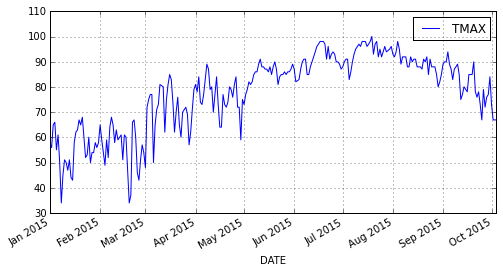

In [62]:
df[['TMAX']].plot(figsize=(8,4), style=['-']);

This first graph is a plot of the daily maximum temperature from Jan 2015 to Oct 2015.  You can see from the plot some very obvious trends, such as the high temperatures for Jan-Mar range between the 30s and high 60s.  During July, August, and the first part of September the temperatures stayed between the 80s and 90s with some short trips into the triple digits.  Sounds like middle Georgia weather, right?  We have validated our data set once again.

Matplotlib can be used in conjunction with the IPython html and display libraries to generate ineractive plots.  This next example is an interactive data plotter.  It allows the user to select a column of data in the source file to graph from a dropdown menu.  Select a few columns to browse the data. But before we do that, let's take a look at the code that makes this possible.

First, we create an instance of a dropdown widget and assign it to the column_headers_dropdown variable.  Next, we give the options attribute a list of the column names that we stored in the DataFrame object df.  We set the value attribute to the default column name of TMAX.  This is what will be graphed if the user does not change the selection.  We added a description to the dropdown box that contains instructions for the user.  Next, we defined two functions, replot() to handle plotting the data once it has been selected and on_trait_change() to define what needs to happen when the user changes the value of the dropdown widget.  Lastly, we use the column_headers_dropdown object's on_trait_change() function to define which function to execute (on_trait_change) and which attribute will be changed (value).  

In [63]:
from IPython.html import widgets
from IPython.display import display, clear_output

column_headers_dropdown = widgets.Dropdown()
column_headers_dropdown.options  = {column: column for column in df.columns}
column_headers_dropdown.value = 'TMAX'
column_headers_dropdown.description = 'Select which column to graph (e.g. TMAX)'
display(column_headers_dropdown)
  
def replot():
    plt.figure(1)
    df[column_headers_dropdown.value].plot(figsize=(8,4), style=['-']);
    plt.xlabel('Date')
    plt.ylabel(column_headers_dropdown.value)
    
def on_trait_change():
    plt.close(1)
    replot()

column_headers_dropdown.on_trait_change(on_trait_change, 'value')

Now let's look at rainfall over the past calendar year to date.  From the plot, we can see there were 4 days so far in which the daily rainfall exceeded 1.5 inches.

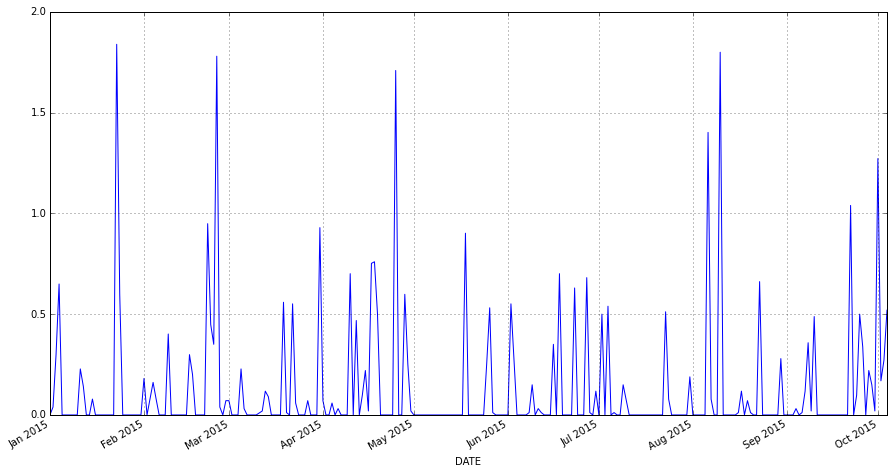

In [64]:
df['PRCP'].plot(figsize=(15,8),  style=['-']);

Now let's try a histogram.  The next plot shows how to generate a histogram using the 'kind='hist'' attribute.  This shows very clearly that, except for days with no rain (which we already concluded occurred on most days), there were many days with small amounts (< 0.5 in) of rain, and a few with large amounts of rain (> 1.0 in).

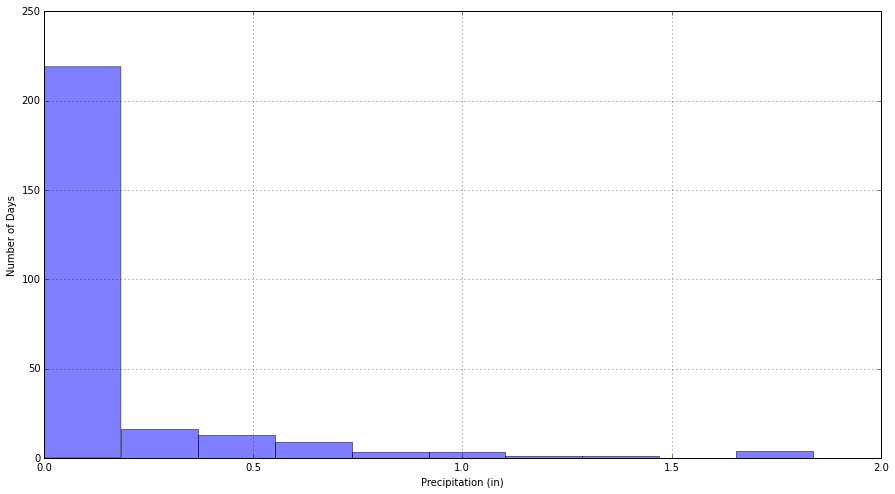

In [65]:
df['PRCP'].plot(kind='hist', figsize=(15,8), alpha=0.5);
plt.xlabel('Precipitation (in)')
plt.ylabel('Number of Days')

Next we will find the total rainfall this year to date based on the weather data gathered at the weather station that collected our data,and confirm the number by crosschecking it with another resource. Using Python's pandas library, that is a simple matter of calling the sum() function.

In [66]:
df['PRCP'].sum()

34.818916440000002

Using [USClimateData.com](http://www.usclimatedata.com/climate/warner-robins/georgia/united-states/usga1271/2015/1) as a source and adding together the total monthly rainfall for each month gives a total year to date rainfall of 32.33 inches.  These numbers do not include rainfall for the first 4 days in October as the dataset shown here does, which accounts for the small discrepancy.

##Atmospheric Model

Now here is an atmospheric model based on data obtained from [NASA.gov](https://www.grc.nasa.gov/www/K-12/airplane/atmos.html).  It shows the temperature on a standard day (T = 59&deg;F).  Slide the bar to the left to see the temperatures at altitude on a cold day or to the right for a hot day.

The temperature at altitude is given by the equation where 0 ft <= altitude <= 36089 ft:
    \begin{eqnarray*}
    T(h) & = & (T_i - lapserate * h) + \Delta T\\
    h & = & altitude (ft)\\
    T(h) & = & temperature at altitude (\circ F)\\
    T_i & = & temperature at sea level(\circ F)\\
    lapserate & = & rate of change in temperature with altitude\\
    & = & 0.00356 \circ F / ft\\
    \end{eqnarray*}
    
###More Markdown Notes
Another quick note about the Markdown syntax:  it can be used to generate publication quality mathematical equations. To enter an equation, surround the text with '\begin{eqnarray*}' and 'end{eqnarray*}'.  To enter an equals sign, use '& = &'.  The underscore character makes the next letter a subscript. Greek and other special characters can be added using the Markdown syntax also.  To end a line, '\\' is used.  Other equation writing tips can be found in [Matplotlib's mathtext documentation](http://matplotlib.org/1.3.0/users/mathtext.html).

###Interactive Atmospheric Model
The graph below shows an interactive atmospheric model.  Simply use the slider to see the effect that having a non-standard day temperature has on the atmospheric temperature.  The slider represents temperature deviation from standard day in &deg;F.

Note from the code below that IPython.html.widgets is imported as interact, and the @interact notation is used to access the interactive features.  Here, the slider position represents the change in temperature from standard day (i.e. how many degrees above or below 59&deg;F the current temperature is at sea level). That value is used in the equation for temperature at altitude, and the equation is then plotted with altitude on the x axis and temperature on the y axis.

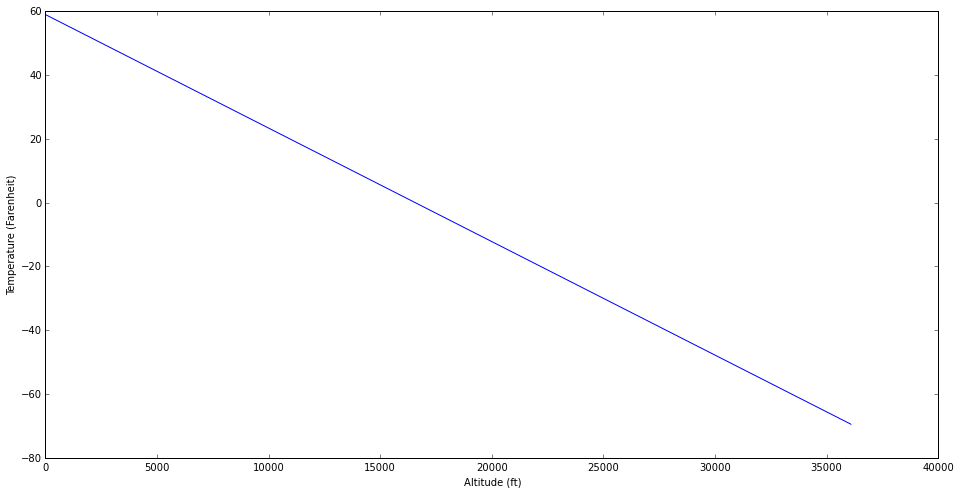

In [67]:
from IPython.html.widgets import interact
@interact
def plot(n=(-30, 30)):
    plt.figure(figsize=(16,8));
    alt_range =  range(0, 36089)
    alt = np.array(alt_range)  
    T = (59 - 0.00356 * alt) + n
    plt.plot(alt, T)
    plt.xlabel('Altitude (ft)')
    plt.ylabel('Temperature (Farenheit)')
    plt.show()

It is clear from the motion of the graph that the shape of the line remains the same; it merely shifts up or down as the temperature rises or falls.  This is very useful for aerodynamic calculations; it accounts for aircraft performance variations based on altitude.  

##Curve-Fitting with NumPy
Another way to get atmospheric data is to use the ICAO Standard Atmosphere Table.  According to [Wikipedia](https://en.wikipedia.org/wiki/International_Standard_Atmosphere), the International Standard Atmosphere is an atmospheric model of how the pressure, temperature, density, and viscosity of the Earth's atmosphere change over a wide range of altitudes or elevations.  Instead of finding a formula to describe these characteristics of the atmosphere, in some cases all that can be found in the literature are tables.  However, using polynomial curve-fitting techniques, any data set can be fit with a polynomial.

Let's look at an example.  Consider the data set shown below.  What if we required a function to describe the pressure at any altitude?  This is especially common in cases where we require a valid number at any altitude, even one that does not appear in the data set.  Using IPython's numpy library, we can find the coefficients for a polynomial that describes the pressure.  We can also take a look at the residual errors and graph the data as well as the curve-fit function to evaluate how well the data matches the curve.

The curve-fit we have chosed to use in this example is a third-order polynomial of the form:
    \begin{eqnarray*}
    y & = & c_1 * x^3 + c_2 * x^2 + c_3 * x + c_4\\
    c_1, c_2, c_3, and c_4 & =& np.polyfit(x, y, 3, full = True)\\
    \end{eqnarray*}


For more information on how curve-fitting works, refer to [this Wikipedia article](https://en.wikipedia.org/wiki/Curve_fitting).  For more information on how numpy performs curve-fitting, refer to [Linear Regression](http://jmduke.com/posts/basic-linear-regressions-in-python/) and [Polyfit residuals](http://stackoverflow.com/questions/15721053/whats-the-error-of-numpy-polyfit).


**Data:** ICAO Standard Atmosphere

**Source:** [ICAO Standard Atmosphere](http://www.digitaldutch.com/atmoscalc/tableatmosphere.htm)

| Altitude | Temperature   | Pressure          | Density |
|: --------:|:-------------:|: -----------------:|: -------:|
| feet     | Fahrenheit    | inches of mercury | kg/m3 |


Here is the data read from the csv file.
        Altitude  Temperature   Pressure   Density
0       0.000000         59.0  29.921300  1.225000
1    3280.839895         47.3  26.540000  1.111640
2    6561.679790         35.6  23.474900  1.006490
3    9842.519685         23.9  20.703000  0.909122
4   13123.359580         12.2  18.202400  0.819129
5   16404.199475          0.5  15.952100  0.736116
6   19685.039370        -11.2  13.932600  0.659697
7   22965.879265        -22.9  12.125200  0.589501
8   26246.719160        -34.6  10.512600  0.525168
9   29527.559055        -46.3   9.078240  0.466348
10  32808.398950        -58.0   7.806630  0.412707
11  36089.238845        -69.7   6.683250  0.363918
12  39370.078740        -69.7   5.708270  0.310828
13  42650.918635        -69.7   4.875520  0.265483
14  45931.758530        -69.7   4.164260  0.226753
15  49212.598425        -69.7   3.556760  0.193674
16  52493.438320        -69.7   3.037890  0.165420
17  55774.278215        -69.7   2.594710 

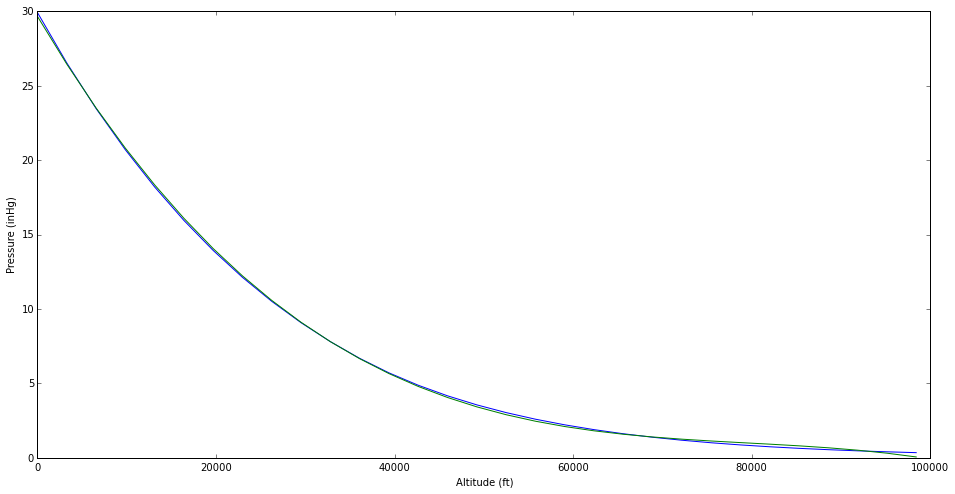

In [68]:
url = "ICAO Standard Atmosphere.csv"

data = pd.read_csv(url)

data['Altitude'] = data['Altitude'] * 3.280839895013123 # 1 meter = 3.280839895013123 ft
x = data['Altitude']
y = data['Pressure']
print('Here is the data read from the csv file.')
print(data)

regression, residuals, _, _, _ = np.polyfit(x, y, 3, full = True)
print('\nHere are the regession curve coefficients.  This is a 3rd order polynomial of the form shown in the text above.')
print(regression)

print('\nHere are the residual errors.')
print(residuals)

fx = regression[0] * x**3 + regression[1] * x**2 + regression[2] * x + regression[3]

plt.figure(figsize=(16,8));
plt.plot(x, y, label='Data')
plt.plot(x, fx, label='Fit') 
plt.xlabel('Altitude (ft)')
plt.ylabel('Pressure (inHg)')
plt.show()

As a reference, here is the data used in this notebook.

In [69]:
print(df)
print(data)

                      STATION         STATION_NAME  ELEVATION  LATITUDE  \
DATE                                                                      
2015-01-01  GHCND:USC00099124  WARNER ROBINS GA US        128   32.6094   
2015-01-02  GHCND:USC00099124  WARNER ROBINS GA US        128   32.6094   
2015-01-03  GHCND:USC00099124  WARNER ROBINS GA US        128   32.6094   
2015-01-04  GHCND:USC00099124  WARNER ROBINS GA US        128   32.6094   
2015-01-05  GHCND:USC00099124  WARNER ROBINS GA US        128   32.6094   
2015-01-06  GHCND:USC00099124  WARNER ROBINS GA US        128   32.6094   
2015-01-07  GHCND:USC00099124  WARNER ROBINS GA US        128   32.6094   
2015-01-08  GHCND:USC00099124  WARNER ROBINS GA US        128   32.6094   
2015-01-09  GHCND:USC00099124  WARNER ROBINS GA US        128   32.6094   
2015-01-10  GHCND:USC00099124  WARNER ROBINS GA US        128   32.6094   
2015-01-11  GHCND:USC00099124  WARNER ROBINS GA US        128   32.6094   
2015-01-12  GHCND:USC0009

#References

[Stack Overflow: IPython Widgets not showing values](http://stackoverflow.com/questions/29998190/ipython-notebook-widgets-not-showing-values)

[matthiaseisen: IPython Dropdown Widgets](http://matthiaseisen.com/pp/patterns/p0067/)

[moderndata: Interactive Python Notebooks](http://moderndata.plot.ly/widgets-in-ipython-notebook-and-plotly/)

[Exploring NYC 311 Calls: Sample IPython Notebook](http://nbviewer.ipython.org/gist/chriddyp/9827cb5086cfab8da092/Pandas%20Widget%20-%20Time%20Series,%20Search,%20and%20Filtering.ipynb)

[Stack Overflow: Write a degree symbol in Markdown](http://stackoverflow.com/questions/26234119/how-can-i-write-a-degree-symbol-in-rmarkdown2-for-html-and-pdf-output)

[Matplotlib: Writing mathematical expressions](http://matplotlib.org/1.3.0/users/mathtext.html)

[NASA.gov](https://www.grc.nasa.gov/www/K-12/airplane/atmos.html)

[USClimateData.com](http://www.usclimatedata.com/climate/warner-robins/georgia/united-states/usga1271/2015/1)

[ICAO Standard Atmosphere Table](http://www.digitaldutch.com/atmoscalc/tableatmosphere.htm)

[IPython Notebooks](http://www.nature.com/naturejobs/science/articles/10.1038/nj7493-523a)

[NOAA's Climate Data Online](http://www.ncdc.noaa.gov/cdo-web/search)

[Markdown Syntax Cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)

[Matplotlib's mathtext documentation](http://matplotlib.org/1.3.0/users/mathtext.html)

[Wikipedia: International Standard Atmosphere](https://en.wikipedia.org/wiki/International_Standard_Atmosphere)

[Wikipedia: Curve fitting](https://en.wikipedia.org/wiki/Curve_fitting)

[Linear Regression](http://jmduke.com/posts/basic-linear-regressions-in-python/)

[Polyfit residuals](http://stackoverflow.com/questions/15721053/whats-the-error-of-numpy-polyfit)